In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load dataset
from sklearn.datasets import load_boston
boston=load_boston()
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
dataset['Price']=boston.target

In [6]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Dimension of the dataset
print(np.shape(dataset))

(506, 14)


In [8]:
# Let's summarize the data to see the distribution of data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
## Check the missing Values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [10]:
# EXploratory Data Analysis
# Correlation -> It is very important in regression problem statement to see how independent features and output features are correlated
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Checked the correlation using pearson correlation which gives the correlation between x and y which gives out a range of values from -1 to 1 to show whether they are negatively correlated (near to -1) or positevly correlated (near to 1) are not at all correlated (near to 0).  

First to check here is the correlation between independent features which is called multi-collinearity. If they are highly positevly correlated or negatively correlated then we can drop the feature. 

Second check the correlation between independent features and dependent feature. 

Text(0, 0.5, 'Price')

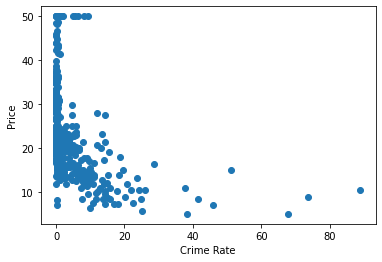

In [11]:
#scatter plot for Price and Crime
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

The relationship is clearly visible as they are inversly correlated. As crime rate increases the price decreases via versa.

Text(0, 0.5, 'Price')

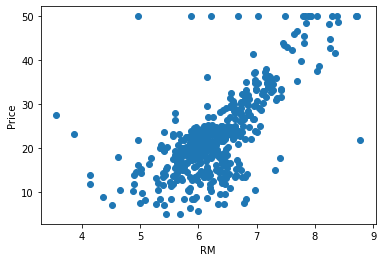

In [12]:
#scatter plot between RM(Average numbe rof rooms) and Price
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel("RM")
plt.ylabel("Price")

The relationship is clearly visible as they are directly correlated. As the number of rooms increases the price increases.  

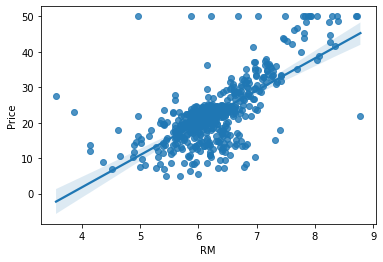

In [13]:
#Regression plot between RM and Price
import seaborn as sns
sns.regplot(x="RM",y="Price",data=dataset)

There is positive correlation between RM and Price. As the number of rooms increases the price increases.  

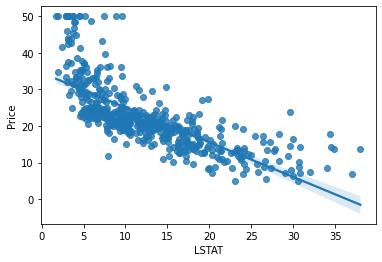

In [14]:
#Regression plot between LSTAT and Price
sns.regplot(x="LSTAT",y="Price",data=dataset)

It is negatively correlated. As LSTAT is decreasing Price is increasing. 

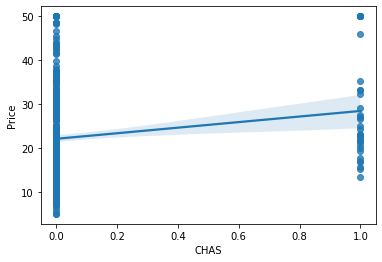

In [15]:
#Regression plot between CHAS and Price
sns.regplot(x="CHAS",y="Price",data=dataset)

There is some amount positive correlation between CHAS and Price. As the CHAS increases the price increases.

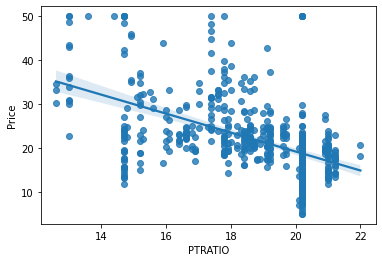

In [16]:
#Regression plot between PTRATIO and Price
sns.regplot(x="PTRATIO",y="Price",data=dataset)

There is some amount of negatively correlation between PTRATIO and Price. As the PTRATIO increases the Price decreases.  

In [17]:
#Apply log transformation to remove skewness
for col in dataset.columns:
    if np.abs(dataset[col].skew()) > 0.3:
        dataset[col] = np.log1p(dataset[col])

In [18]:
#Independent and dependent features
X = dataset.iloc[:,:-1]

y = dataset.iloc[:,-1]

In [19]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006300,2.944439,2.31,0.0,0.430483,2.024853,4.192680,1.627278,0.693147,5.693732,2.791165,5.986201,1.788421
1,0.026944,0.000000,7.07,0.0,0.384582,2.004314,4.380776,1.786261,1.098612,5.493061,2.933857,5.986201,2.316488
2,0.026924,0.000000,7.07,0.0,0.384582,2.102303,4.128746,1.786261,1.098612,5.493061,2.933857,5.975919,1.615420
3,0.031857,0.000000,2.18,0.0,0.377066,2.079192,3.845883,1.954757,1.386294,5.407172,2.980619,5.980479,1.371181
4,0.066770,0.000000,2.18,0.0,0.377066,2.097650,4.010963,1.954757,1.386294,5.407172,2.980619,5.986201,1.845300


In [20]:
y.head()

0    3.218876
1    3.117950
2    3.575151
3    3.538057
4    3.616309
Name: Price, dtype: float64

In [21]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


# Model Training

In [22]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

def train(model, X, y):
    # train the model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)
    
    # predict the training set
    pred = model.predict(X_test)
    
    # perform 10 fold cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MAE:",mean_absolute_error(y_test,pred))
    print("MAPE:",mean_absolute_percentage_error(y_test,pred))
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)
   
    print()
    print("Model Training accuracy:", model.score(X_train, y_train)*100)
    print("Model Testing accuracy:", model.score(X_test, y_test)*100)
    print("r2 Score Model Accuracy:", r2_score(y_test, pred)*100)

# Linear Regression

Model Report
MAE: 0.12079093578718998
MAPE: 0.04072270710488445
MSE: 0.03051049234915917
CV Score: 0.0457472528916747

Model Training accuracy: 80.16673034349316
Model Testing accuracy: 77.81447657342557
r2 Score Model Accuracy: 77.81447657342557


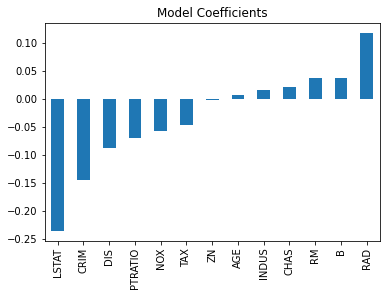

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, dataset.iloc[:,:-1].columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

# Decision Tree

Model Report
MAE: 0.12774376798267087
MAPE: 0.04448428179279221
MSE: 0.0366124901115479
CV Score: 0.06445636102898732

Model Training accuracy: 100.0
Model Testing accuracy: 73.37744511693022
r2 Score Model Accuracy: 73.37744511693022


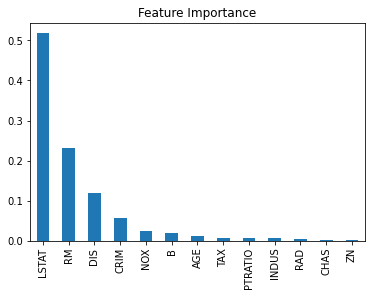

In [24]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, dataset.iloc[:,:-1].columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

# Random Forest

Model Report
MAE: 0.10327551163509542
MAPE: 0.0355856716145282
MSE: 0.023905701223526286
CV Score: 0.04032265012946762

Model Training accuracy: 97.84062027477297
Model Testing accuracy: 82.61711123983721
r2 Score Model Accuracy: 82.61711123983721


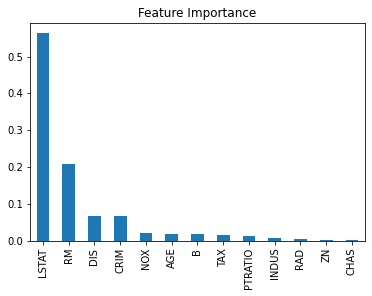

In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, dataset.iloc[:,:-1].columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

In [26]:
#Linear Regression
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [27]:
#model to pickle file to deploy the model
import pickle
pickle.dump(regression,open('regmodel.pkl','wb'))

In [28]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

## Prediction
pickled_model.predict(scaler.transform(X[0].reshape(1,-1)))


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([7.44640613])